In [1]:
# 10:05 AM
# 10:20 AM
import os
print(os.path.dirname(os.getcwd()).split('\\')[-1])

HW_7_TS_ML_Inputs-U10


<font color='red'>Comment</font>

y = mx + b

m = slope

b = intercept

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
csvpath="C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/111321/01_Salary_Data.csv"
#df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

df = pd.read_csv(csvpath)

#df = pd.read_csv(Path('../Resources/Salary_Data.csv'))

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


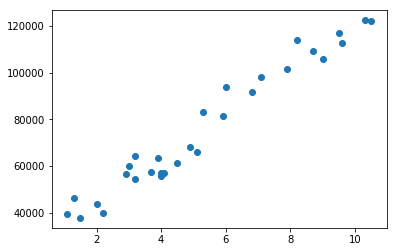

In [5]:
plt.scatter(df.YearsExperience, df.Salary)

<font color='red'>Comment</font>

X can't feed on pandas series. We use reshape and convert to numpy array, to satisfy scikit-learn requirements of having 2-dimensional X variable. Series are 1D.

Y can accept a pandas series tho...

reshape(-1, 1) = column vector

reshape(1, 1) = row vector

In [6]:
df.YearsExperience



0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [7]:
df.YearsExperience.values

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [8]:
df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
# the numpy instruction that moves data from original organization to organization that fits this next process
df.YearsExperience.values.reshape(-1, 1)

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
# circle to circle etc..
X = df.YearsExperience.values.reshape(-1, 1)
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [11]:
# look at type

In [12]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(30, 1)

In [13]:
y = df.Salary

In [14]:
# Create a model with scikit-learn
model = LinearRegression()
model

LinearRegression()

COCCmath, Why a "least squares regression line" is called that...

https://www.youtube.com/watch?v=jEEJNz0RK4Q

In [15]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

<font color='red'>Comment</font>

coefficient = the slope.

In [16]:
# The slope
print(model.coef_)

[9449.96232146]


<font color='red'>Comment</font>

itercept = the y intercept.

In [17]:
# The y-intercept
print(model.intercept_)

25792.20019866871


In [18]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)

<font color='red'>Comment</font>

Given years of experience, we can predict salary.

The blue dots are observations, actual years & salary data points which were collected in the wild, perhaps by a survey.

In [19]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


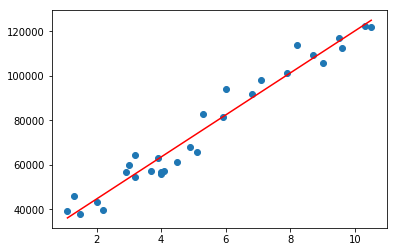

In [20]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [21]:
# next; score the model using its metrics

In [22]:
# Score: between -1 and 1
# score apparently = r
# r squared = score squared ... since score is around 1, r2 will also be close to one
# less meaningful to Garth
# mse = avg of sq errors
# rmse -- counteracts squaring effect
# std -- sd be less than rmse


In [23]:
# Relevant metrics - score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [17]:
# Print releveant metrics.
print(f"The score is {score}.")  # correletion coefficient = extent to which the variables move together. [-1, 1]
print(f"The r2 is {r2}.")  # correlation coefficient squared. [0, 1]
print(f"The mean squared error is {mse}.")  # mean squared error. average of the square of the errors. less error = more accurate model
print(f"The root mean squared error is {rmse}.")  # square root of the above. less error = more accurate model
print(f"The standard deviation is {std}.")  # std of y. ideally, std < rmse, meaning, there's greater variance in the std than y

The score is 0.9569566641435086.
The r2 is 0.9569566641435086.
The mean squared error is 31270951.722280968.
The root mean squared error is 5592.043608760662.
The standard deviation is 26953.65024877583.
